In [11]:
import matplotlib.pyplot as plt

def showImage(img, figsize=(10,10)):
    h, w = img.shape

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Use imshow to display the binary image
    # cmap='gray' displays the binary image in grayscale
    ax.imshow(img, cmap='gray', origin='upper', extent=[0, w, h, 0])

    # Set axis labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    x_ticks = np.arange(0, w, 200)
    y_ticks = np.arange(0, h, 10)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    # Show the plot
    plt.show()

Cursor Found!
238 98


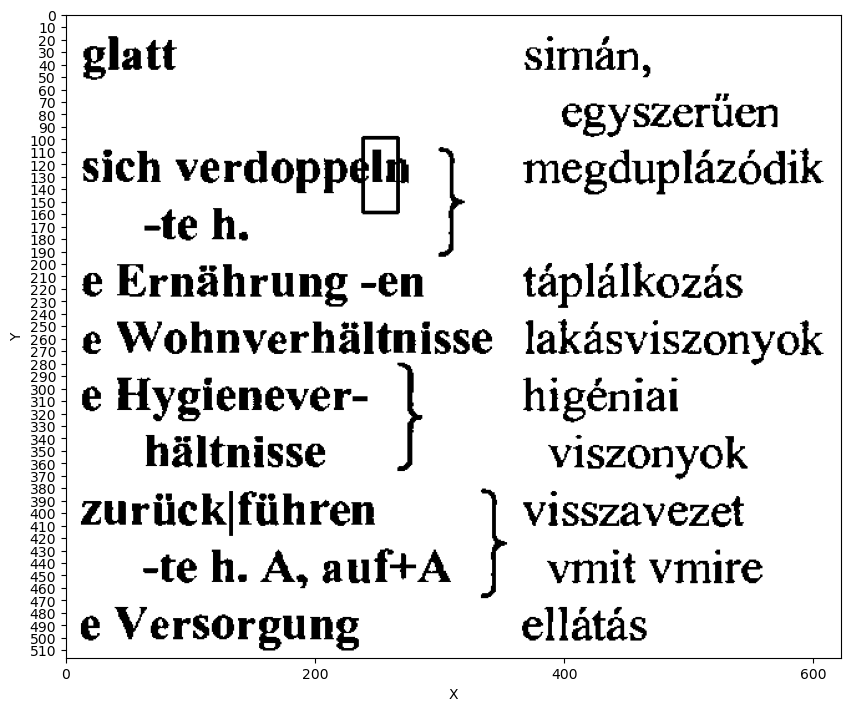

In [18]:
import numpy as np
import cv2

#Using custom template for Set A (setA.png)
#Using custom template for Set B (t2.png for t2_x.jpg, t3.png for t3_x.jpg )
#Use your template for set B (t1_x.jpg images)

imagePath ='./images/img9.jpg'
templatePath='./images/kapocs.jpg' 

# Resize function to implement mutli-scale template matching 
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

#Loading image and template

blur_image = cv2.threshold(cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
template = cv2.threshold(cv2.imread(templatePath, cv2.IMREAD_GRAYSCALE).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# #Applying Gaussian blur to image to reduce noise.
# blur_image = cv2.GaussianBlur(img,(3,3),0)

# #Converting image to grayscale
# blur_image = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

# #Converting template to grayscale.
# template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

(tH, tW) = template.shape[:2]


template_laplacian = cv2.Laplacian(template,cv2.CV_8U)
img_laplacian = cv2.Laplacian(blur_image,cv2.CV_8U)
found = None

#Multi-Scaling Template
for scale in np.linspace(0.3, 0.6,8 )[::-1]:
    resized = resize(template_laplacian, width = int(template_laplacian.shape[1] * scale))
    r = template_laplacian.shape[1] / float(resized.shape[1])
    result = cv2.matchTemplate(img_laplacian, resized, cv2.TM_CCOEFF)
    #Finding most co-related point.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
    
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
(maxVal, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] -10 ), int(maxLoc[1] )-5)
(endX, endY) = (int((maxLoc[0] + tW) ), int((maxLoc[1] + tH -10) ))

# Draw a bounding box around the detected result if greater than threshold.
threshold = 98800
if(maxVal > threshold or (maxVal>93500 and maxVal<95000)):
    print('Cursor Found!')
    print(startX, startY)
    cv2.rectangle(blur_image, (startX, startY), (endX, endY), (0, 0, 0), 2)
    showImage(blur_image)
else:
    print('Cursor not found')